<a href="https://colab.research.google.com/github/dharmendra-chouhan/-DEAS-Accounts---Municipal-Corporation/blob/master/TimeSheet_01_06_2020_to_13_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title  {display-mode: "form"}
import pandas as pd

import Data bugzilla

In [2]:
#@title  {display-mode: "form"}
from google.colab import files
uploaded = files.upload()

Saving bugs-2020-06-16.csv to bugs-2020-06-16.csv


In [7]:
#@title  {display-mode: "form"}
bugzilla_1junto13jun= pd.read_csv('bugs-2020-06-16.csv', encoding='latin-1')

In [9]:
bugzilla_1junto13jun.head(2)

,Bug ID,Product,Component,Assignee,Orig. Est.,Status,Resolution,Summary,Changed,Deadline,Actual Hours,Start Date,Patch Release Version (Defect Closure-For Developers ),Patch Release Version (Defect Open- For Testers),Project Name
0,33115,KCCA,Document Management System,adaundkar51@gmail.com,2.0,VERIFIED,TESTING CLOSED,"In Routing History form, When (Non-Actionable)...",2019-09-18 15:37:01,2019-08-22,0.0,2019-08-22,V 2.09,V 2.06,NaN
1,33181,KCCA,Document Management System,adaundkar51@gmail.com,1.0,VERIFIED,TESTING CLOSED,DMS>>Report>>Logical Folder Structure Report>>...,2019-09-17 16:05:45,2019-08-30,0.0,2019-08-30,V 2.09,---,NaN


In [10]:
# bugzilla_1junto13jun.loc[bugzilla_1junto13jun['Assignee']=='afak.pangarkar@gmail.com']
# bugzilla_1junto13jun.loc[bugzilla_1junto13jun['Bug ID']==34833]
bugzilla_1junto13jun.loc[bugzilla_1junto13jun['Bug ID']==34648]

,Bug ID,Product,Component,Assignee,Orig. Est.,Status,Resolution,Summary,Changed,Deadline,Actual Hours,Start Date,Patch Release Version (Defect Closure-For Developers ),Patch Release Version (Defect Open- For Testers),Project Name
4557,34648,Aksentech_Payroll,HRMS,santhoshkodurijava@gmail.com,32.0,RESOLVED,FIXED ON DEVELOPMENT,"Client Master and Project detail Add , Edit an...",2020-06-12 16:15:04,2020-05-11,0.0,2020-05-06,Patch V1.01,---,NaN


import Data clockify

In [26]:
#@title  {display-mode: "form"}
from google.colab import files
uploaded = files.upload()

Saving Clockify_Detailed_Report_06_01_2020-06_13_2020.csv to Clockify_Detailed_Report_06_01_2020-06_13_2020 (1).csv


In [32]:
#@title  {display-mode: "form"}
clockify_1junto13jun= pd.read_csv('Clockify_Detailed_Report_06_01_2020-06_13_2020.csv', encoding='latin-1')

**Clockify and Bugzilla Merging Data**

In [28]:

#@title  {display-mode: "form"}
scriteria = bugzilla_1junto13jun['Bug ID'].values.tolist()  
df=pd.DataFrame(clockify_1junto13jun)
clockifybugs = df[0:0]
clockify_1junto13jun['Bug ID'] =0
for x in scriteria:
  df=pd.DataFrame(clockify_1junto13jun[clockify_1junto13jun['Description'].str.upper().str.contains(str(x))])
  df['Bug ID'] =x
  clockifybugs=clockifybugs.append(df)
clockifybugs = pd.merge(clockifybugs, bugzilla_1junto13jun, on='Bug ID')
clockifybugsmer=clockifybugs[['Bug ID','Product', 'User','Assignee','Description','Summary','Orig. Est.','Duration (decimal)','Status','Resolution','Actual Hours','Start Date_x','End Date']] 
clockifybugsmer


,Bug ID,Product,User,Assignee,Description,Summary,Orig. Est.,Duration (decimal),Status,Resolution,Actual Hours,Start Date_x,End Date
0,29255.0,KCCA,Priyesh Panvalkar,adaundkar51@gmail.com,"Bug 29255 - After pre and post payment , In po...","In Scrutiny Report, Department Name,Designatio...",1.0,1.00,VERIFIED,TESTING CLOSED,1.0,06/01/2020,06/01/2020
1,34764.0,Aksentech_Payroll,Deepraj Singh Panwar,afak.pangarkar@gmail.com,Bug 34764 - User Log - Login and Logout Captur...,User Log - Login and Logout Capturing the Even...,18.0,1.80,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/08/2020,06/08/2020
2,34764.0,Aksentech_Payroll,Deepraj Singh Panwar,afak.pangarkar@gmail.com,Bug 34764 - User Log - Login and Logout Captur...,User Log - Login and Logout Capturing the Even...,18.0,4.83,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/08/2020,06/08/2020
3,34764.0,Aksentech_Payroll,Deepraj Singh Panwar,afak.pangarkar@gmail.com,Bug 34764 - User Log - Login and Logout Captur...,User Log - Login and Logout Capturing the Even...,18.0,0.86,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/05/2020,06/05/2020
4,34764.0,Aksentech_Payroll,Deepraj Singh Panwar,afak.pangarkar@gmail.com,Bug 34764 - User Log - Login and Logout Captur...,User Log - Login and Logout Capturing the Even...,18.0,0.77,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/04/2020,06/04/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,34648.0,Aksentech_Payroll,santhosh,santhoshkodurijava@gmail.com,"34648 client Master and project detail Add,Ed...","Client Master and Project detail Add , Edit an...",32.0,10.50,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/04/2020,06/04/2020
402,34648.0,Aksentech_Payroll,santhosh,santhoshkodurijava@gmail.com,"34648 client Master and project detail Add,Ed...","Client Master and Project detail Add , Edit an...",32.0,9.50,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/03/2020,06/03/2020
403,34648.0,Aksentech_Payroll,santhosh,santhoshkodurijava@gmail.com,"34648 client Master and project detail Add,Ed...","Client Master and Project detail Add , Edit an...",32.0,9.50,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/02/2020,06/02/2020
404,34648.0,Aksentech_Payroll,santhosh,santhoshkodurijava@gmail.com,"34648 client Master and project detail Add,Ed...","Client Master and Project detail Add , Edit an...",32.0,9.50,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/01/2020,06/01/2020


Date and User wise Bugzilla and Clockify Orig Est.,Actual and Clockify Hours sum

In [33]:
#@title  {display-mode: "form"}
import numpy as np
from math import modf
# ,'Start Date_x','End Date'
grouped=clockifybugsmer.groupby(['Start Date_x','End Date','User','Orig. Est.','Actual Hours','Bug ID'])
grop_bud_sum=grouped['Duration (decimal)'].agg([np.sum])
pd.set_option('display.max_rows', grop_bud_sum.shape[0]+1)

print(grop_bud_sum)

                                                                                sum
Start Date_x End Date   User                 Orig. Est. Actual Hours Bug ID        
06/01/2020   06/01/2020 Chiranjib Pattanayak 0.00       0.00         34724.0   2.00
                                                                     34725.0   2.50
                                                                     34729.0   1.67
                                                                     34731.0   2.33
                        Dharmendra Chouhan   3.50       2.50         34769.0   2.50
                                             16.00      6.50         34765.0   6.50
                        Dikshita Soneria     6.00       6.00         34768.0   3.15
                                             8.00       8.00         34143.0   3.90
                        Manoj Sawan          24.00      26.00        34749.0   9.25
                        Priyanka Mankare     6.00       6.00         34768.0

In [35]:
import numpy as np
from math import modf
# ,'Start Date_x','End Date'
grouped=clockifybugsmer.groupby(['User','Orig. Est.','Actual Hours','Bug ID'])
grop_bud_sum=grouped['Duration (decimal)'].agg([np.sum])
pd.set_option('display.max_rows', grop_bud_sum.shape[0]+1)

print(grop_bud_sum)

                                                         sum
User                 Orig. Est. Actual Hours Bug ID         
Afak Pangarkar       0.00       0.00         34795.0    1.33
                     4.00       3.00         34805.0    0.50
                                4.00         34796.0    0.58
                     18.00      18.00        34810.0    0.42
                     24.00      0.00         34819.0    0.33
Ashok Parmar         0.00       0.00         34806.0   27.08
Bhushan Raole        0.00       0.00         34795.0    0.29
                     2.00       2.00         34792.0    0.18
                                             34793.0    0.18
                     3.00       3.00         34776.0    0.48
                     4.00       4.00         34796.0    0.24
                     8.00       8.00         34767.0    0.48
Chiranjib Pattanayak 0.00       0.00         34724.0    2.00
                                             34725.0    2.50
                        

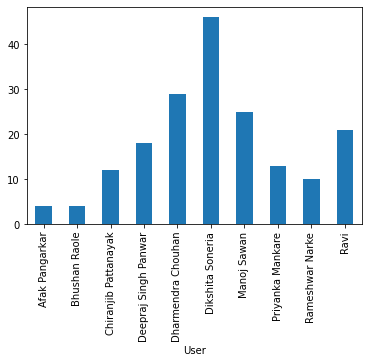

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
clockifybugsmer.groupby('User')['Duration (decimal)'].nunique().plot(kind='bar')
plt.show()



In [ ]:
print(clockifybugsmer.groupby('User')['Duration (decimal)'].sum())

User
Afak Pangarkar           1.83
Bhushan Raole            1.56
Chiranjib Pattanayak    30.91
Deepraj Singh Panwar    46.98
Dharmendra Chouhan      54.05
Dikshita Soneria        78.05
Manoj Sawan             92.47
Priyanka Mankare         7.81
Rameshwar Narke         16.83
Ravi                    64.85
Name: Duration (decimal), dtype: float64
